
# Arrests and Strip Searches
This dataset includes information related to all arrests and strip searches.

This dataset includes information related to all arrests and strip searches. A strip search refers to a search conducted by a police officer on a person, which includes the removal of some or all clothing and a visual inspection of the body. The dataset also includes indicators of whether a person was booked at a police station within 24 hours following a particular arrest event. Due to issues with the booking template, there may be some records where a person was strip searched, but the data does not indicate a booking (i.e., value = 0); in those cases, the user should presume a booking took place. 

The location of arrest is aggregated to the Division level and refers to where the arrest took place within Division boundaries. Users should not interpret location as the Division to which the arresting officer was assigned. For some arrests, the location could not be geo-coded or the arrest took place outside of City of Toronto boundaries in other jurisdictions; these are indicated by XX. The age of person arrested and/or strip searched is their age at the time of the arrest, as given to the arresting officer. <br>
Dataset Link Here : <br>
https://data.torontopolice.on.ca/datasets/TorontoPS::arrests-and-strip-searches-rbdc-arr-tbl-001/explore

# Libraries

In [1]:
import numpy as np
import pandas as pd
# LabelEncoder(String to int)
from sklearn.preprocessing import LabelEncoder
# Visulization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Dataset  <br>
https://data.torontopolice.on.ca/datasets/TorontoPS::arrests-and-strip-searches-rbdc-arr-tbl-001/explore

In [2]:
ARRD=pd.read_csv('/content/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv')
print(ARRD)

       Arrest_Year Arrest_Month  EventID   ArrestID  PersonID  \
0             2020    July-Sept  1005907  6017884.0    326622   
1             2020    July-Sept  1014562  6056669.0    326622   
2             2020      Oct-Dec  1029922  6057065.0    326622   
3             2021      Jan-Mar  1052190  6029059.0    327535   
4             2021      Jan-Mar  1015512  6040372.0    327535   
...            ...          ...      ...        ...       ...   
65271         2021      Oct-Dec  1055609  6044336.0    316123   
65272         2021      Oct-Dec  1032758  6031692.0    307736   
65273         2021      Oct-Dec  1021067  6064396.0    324057   
65274         2021      Oct-Dec  1008998  6008662.0    331870   
65275         2021      Oct-Dec  1033395  6032145.0    310583   

          Perceived_Race Sex    Age_group__at_arrest_  \
0                  White   M      Aged 35 to 44 years   
1                  White   M      Aged 35 to 44 years   
2      Unknown or Legacy   M      Aged 35 to 44 

In [3]:
#First Five Dataset
ARRD.head()

Arrest_Year Arrest_Month  EventID   ArrestID  PersonID     Perceived_Race  \
0         2020    July-Sept  1005907  6017884.0    326622              White   
1         2020    July-Sept  1014562  6056669.0    326622              White   
2         2020      Oct-Dec  1029922  6057065.0    326622  Unknown or Legacy   
3         2021      Jan-Mar  1052190  6029059.0    327535              Black   
4         2021      Jan-Mar  1015512  6040372.0    327535        South Asian   

  Sex Age_group__at_arrest_ Youth_at_arrest__under_18_years ArrestLocDiv  ...  \
0   M   Aged 35 to 44 years                     Not a youth           54  ...   
1   M   Aged 35 to 44 years                     Not a youth           54  ...   
2   M   Aged 35 to 44 years                     Not a youth           54  ...   
3   M   Aged 25 to 34 years                     Not a youth           XX  ...   
4   M   Aged 25 to 34 years                     Not a youth           XX  ...   

   Actions_at_arrest___Resisted__d  Actions_at_arrest___Mental_inst  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                0   
4                                0                                0   

  Actions_at_arrest___Assaulted_o  Actions_at_arrest___Cooperative  \
0                               0                                1   
1                               0                                0   
2                               0                                0   
3                               0                                0   
4                               0                                0   

   SearchReason_CauseInjury  SearchReason_AssistEscape  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

   SearchReason_PossessWeapons  SearchReason_PossessEvidence  ItemsFound  \
0                          NaN                           NaN         NaN   
1                          NaN                           NaN         NaN   
2                          NaN                           NaN         NaN   
3                          NaN                           NaN         NaN   
4                          NaN                           NaN         NaN   

   ObjectId  
0         1  
1         2  
2         3  
3         4  
4         5  

[5 rows x 25 columns]

In [4]:
#Last Five Rows of Dataset
ARRD.tail()

Arrest_Year Arrest_Month  EventID   ArrestID  PersonID  \
65271         2021      Oct-Dec  1055609  6044336.0    316123   
65272         2021      Oct-Dec  1032758  6031692.0    307736   
65273         2021      Oct-Dec  1021067  6064396.0    324057   
65274         2021      Oct-Dec  1008998  6008662.0    331870   
65275         2021      Oct-Dec  1033395  6032145.0    310583   

          Perceived_Race Sex    Age_group__at_arrest_  \
65271         Indigenous   F      Aged 25 to 34 years   
65272        South Asian   M      Aged 35 to 44 years   
65273              White   F      Aged 45 to 54 years   
65274  Unknown or Legacy   M  Aged 17 years and under   
65275             Latino   M      Aged 18 to 24 years   

       Youth_at_arrest__under_18_years ArrestLocDiv  ...  \
65271                      Not a youth           XX  ...   
65272                      Not a youth           54  ...   
65273                      Not a youth           XX  ...   
65274  Youth (aged 17 years and under)           XX  ...   
65275                      Not a youth           XX  ...   

       Actions_at_arrest___Resisted__d  Actions_at_arrest___Mental_inst  \
65271                                1                                0   
65272                                0                                0   
65273                                0                                0   
65274                                0                                0   
65275                                0                                0   

      Actions_at_arrest___Assaulted_o  Actions_at_arrest___Cooperative  \
65271                               0                                0   
65272                               0                                0   
65273                               0                                0   
65274                               0                                1   
65275                               0                                1   

       SearchReason_CauseInjury  SearchReason_AssistEscape  \
65271                       NaN                        NaN   
65272                       NaN                        NaN   
65273                       NaN                        NaN   
65274                       NaN                        NaN   
65275                       NaN                        NaN   

       SearchReason_PossessWeapons  SearchReason_PossessEvidence  ItemsFound  \
65271                          NaN                           NaN         NaN   
65272                          NaN                           NaN         NaN   
65273                          NaN                           NaN         NaN   
65274                          NaN                           NaN         NaN   
65275                          NaN                           NaN         NaN   

       ObjectId  
65271     65272  
65272     65273  
65273     65274  
65274     65275  
65275     65276  

[5 rows x 25 columns]

In [5]:
#shape of dataset
ARRD.shape

(65276, 25)

*Arrests and Strip Searches dataset contains **65276** Rows and **25** features*

In [6]:
dataset=ARRD

# Data Preprocessing-EDA

In [7]:
#identify the null values
dataset.isnull().sum()

Arrest_Year                            0
Arrest_Month                           0
EventID                                0
ArrestID                             469
PersonID                               0
Perceived_Race                         4
Sex                                    0
Age_group__at_arrest_                 24
Youth_at_arrest__under_18_years        0
ArrestLocDiv                           0
StripSearch                            0
Booked                                 0
Occurrence_Category                  165
Actions_at_arrest___Concealed_i        0
Actions_at_arrest___Combative__        0
Actions_at_arrest___Resisted__d        0
Actions_at_arrest___Mental_inst        0
Actions_at_arrest___Assaulted_o        0
Actions_at_arrest___Cooperative        0
SearchReason_CauseInjury           57475
SearchReason_AssistEscape          57475
SearchReason_PossessWeapons        57475
SearchReason_PossessEvidence       57475
ItemsFound                         57475
ObjectId        

*Datasets are related to arrest and strip search,In which Nine Features contains Null Values Like ItermFound ,SearchReason_PossessEvidence, SearchReason_PossessWeapons , SearchReason_AssistEscape and SearchReason_CauseInjury contain 57475 null Values , Occurrence_Category contains 165 null values ,Age_group__at_arrest_ contains 24 null values and ArrestID  contains 469 null values*

**Info of Dataset**

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65276 entries, 0 to 65275
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Arrest_Year                      65276 non-null  int64  
 1   Arrest_Month                     65276 non-null  object 
 2   EventID                          65276 non-null  int64  
 3   ArrestID                         64807 non-null  float64
 4   PersonID                         65276 non-null  int64  
 5   Perceived_Race                   65272 non-null  object 
 6   Sex                              65276 non-null  object 
 7   Age_group__at_arrest_            65252 non-null  object 
 8   Youth_at_arrest__under_18_years  65276 non-null  object 
 9   ArrestLocDiv                     65276 non-null  object 
 10  StripSearch                      65276 non-null  int64  
 11  Booked                           65276 non-null  int64  
 12  Occurrence_Categor

# Visualizing Categorical Data

In [9]:
#Pie of Sex Feature of dataset
Sexfig = px.pie(dataset, names='Sex', 
             height=300, width=600, 
             title='Sex Overview',
             color_discrete_sequence=['#4c78a8', '#72b7b2'])
Sexfig.update_layout(plot_bgcolor='#fafafa', paper_bgcolor='#fafafa')
Sexfig.show()

*According Arrests and Strip Searches (RBDC-ARR-TBL-001) Report,80.7%  males,19.3% Female and 0.0138% for other are arrested in Specific Duration Period of Year.*

In [10]:
#label encoder of Age_group__at_arrest_ Feature of dataset
AGRfig = px.pie(dataset, names='Age_group__at_arrest_', 
             height=300, width=600, 
             title='Age_group__at_arrest_ Overview',
             color_discrete_sequence=['#779630', '#72b7b2'])
AGRfig.update_layout(plot_bgcolor='#fafafa', paper_bgcolor='#fafafa')
AGRfig.show()

*According Arrests and Strip Searches (RBDC-ARR-TBL-001) Report,32.1%  aged group 25 to 34 years  ,24.9% aged group of 35 to 44 years , 15.4% aged group of 18 to 24 years , 13.9% aged group of 45 to 54 years , 7.03% aged group of 55 to 64 years and 2.58% for aged group of 17 years to younger are arrested in Specific Duration Period of Year.*

In [11]:
#label encoder of Perceived_Race Feature of dataset
PRfig = px.pie(dataset, names='Perceived_Race', 
             height=300, width=800, 
             title='Perceived_Race Overview',
             color_discrete_sequence=['#4c78a8', '#72b7b2'])
PRfig.update_layout(plot_bgcolor='#fafafa', paper_bgcolor='#fafafa')
PRfig.show()

In [12]:
#label encoder of Youth_at_arrest__under_18_years Feature of dataset
YRYfig = px.pie(dataset, names='Youth_at_arrest__under_18_years', 
             height=300, width=600, 
             title='Youth_at_arrest__under_18_years Overview',
             color_discrete_sequence=['#4c78a8', '#37441a'])
YRYfig.update_layout(plot_bgcolor='#fafafa', paper_bgcolor='#fafafa')
YRYfig.show()

*In Arrests and Strip Searches (RBDC-ARR-TBL-001) Report,90.3% record for the Not a youth,2.58% for Youth(aged 17 and younger) and 2.08% for Youth(aged 17 and Younger).*

In [13]:
#label encoder of ArrestLocDiv Feature of dataset
ADfig = px.pie(dataset, names='ArrestLocDiv', 
             height=300, width=600, 
             title='ArrestLocDiv Overview',
             color_discrete_sequence=['#37441a', '#72b7b2'])
ADfig.update_layout(plot_bgcolor='#fafafa', paper_bgcolor='#fafafa')
ADfig.show()

**Label Encoding**

In [14]:
#label encoder of Sex Feature of dataset
#label encoder can't handle missing values
dataset['Sex'] = dataset['Sex'].fillna('None')
# Label encode Sex feature
label_encoder = LabelEncoder()
dataset['Sex'] = label_encoder.fit_transform(dataset['Sex'])

In [15]:
#label encoder of Age_group__at_arrest_ Feature of dataset
#label encoder can't handle missing values
dataset['Age_group__at_arrest_'] = dataset['Age_group__at_arrest_'].fillna('None')
# Label encode Age_group__at_arrest_ feature
label_encoder = LabelEncoder()
dataset['Age_group__at_arrest_'] = label_encoder.fit_transform(dataset['Age_group__at_arrest_'])

In [16]:
#label encoder of Arrest_Month Feature of dataset
#label encoder can't handle missing values
dataset['Arrest_Month'] = dataset['Arrest_Month'].fillna('None')
# Label encode Arrest_Month feature
label_encoder = LabelEncoder()
dataset['Arrest_Month'] = label_encoder.fit_transform(dataset['Arrest_Month'])

In [17]:
#label encoder of Perceived_Race Feature of dataset
#label encoder can't handle missing values
dataset['Perceived_Race'] = dataset['Perceived_Race'].fillna('None')
# Label encode Perceived_Race feature
label_encoder = LabelEncoder()
dataset['Perceived_Race'] = label_encoder.fit_transform(dataset['Perceived_Race'])

In [18]:
#label encoder of Youth_at_arrest__under_18_years Feature of dataset
#label encoder can't handle missing values
dataset['Youth_at_arrest__under_18_years'] = dataset['Youth_at_arrest__under_18_years'].fillna('None')
# Label encode Youth_at_arrest__under_18_years feature
label_encoder = LabelEncoder()
dataset['Youth_at_arrest__under_18_years'] = label_encoder.fit_transform(dataset['Youth_at_arrest__under_18_years'])

In [19]:
#label encoder of ArrestLocDiv Feature of dataset
#label encoder can't handle missing values
dataset['ArrestLocDiv'] = dataset['ArrestLocDiv'].fillna('None')
# Label encode ArrestLocDiv feature
label_encoder = LabelEncoder()
dataset['ArrestLocDiv'] = label_encoder.fit_transform(dataset['ArrestLocDiv'])

**Unique Values of Features**

In [20]:
#Unique Value of Sex Feature of dataset
print(dataset['Sex'].unique())
#Unique Value of Age_group__at_arrest_ Feature of dataset
print(dataset['Age_group__at_arrest_'].unique())
#Unique Value of Arrest_Month Feature of dataset
print(dataset['Arrest_Month'].unique())
#Unique Value of Perceived_Race Feature of dataset
print(dataset['Perceived_Race'].unique())
#Unique Value of Youth_at_arrest__under_18_years Feature of dataset
print(dataset['Youth_at_arrest__under_18_years'].unique())
#Unique Value of ArrestLocDiv Feature of dataset
print(dataset['ArrestLocDiv'].unique())

[1 0 2]
[4 3 5 6 2 7 8 9 1 0]
[2 3 1 0]
[8 7 0 6 2 4 3 1 5]
[0 1 2]
[15 17 10 13  3 12 14  6  0  1  2  9  4 16 11  5  8  7]


**Remove the Null Values By Rows**

In [21]:
dataset=dataset.dropna()

In [22]:
dataset.isnull().sum()

Arrest_Year                        0
Arrest_Month                       0
EventID                            0
ArrestID                           0
PersonID                           0
Perceived_Race                     0
Sex                                0
Age_group__at_arrest_              0
Youth_at_arrest__under_18_years    0
ArrestLocDiv                       0
StripSearch                        0
Booked                             0
Occurrence_Category                0
Actions_at_arrest___Concealed_i    0
Actions_at_arrest___Combative__    0
Actions_at_arrest___Resisted__d    0
Actions_at_arrest___Mental_inst    0
Actions_at_arrest___Assaulted_o    0
Actions_at_arrest___Cooperative    0
SearchReason_CauseInjury           0
SearchReason_AssistEscape          0
SearchReason_PossessWeapons        0
SearchReason_PossessEvidence       0
ItemsFound                         0
ObjectId                           0
dtype: int64

# Heatmap

<ipython-input-23-7888ef90e27c>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



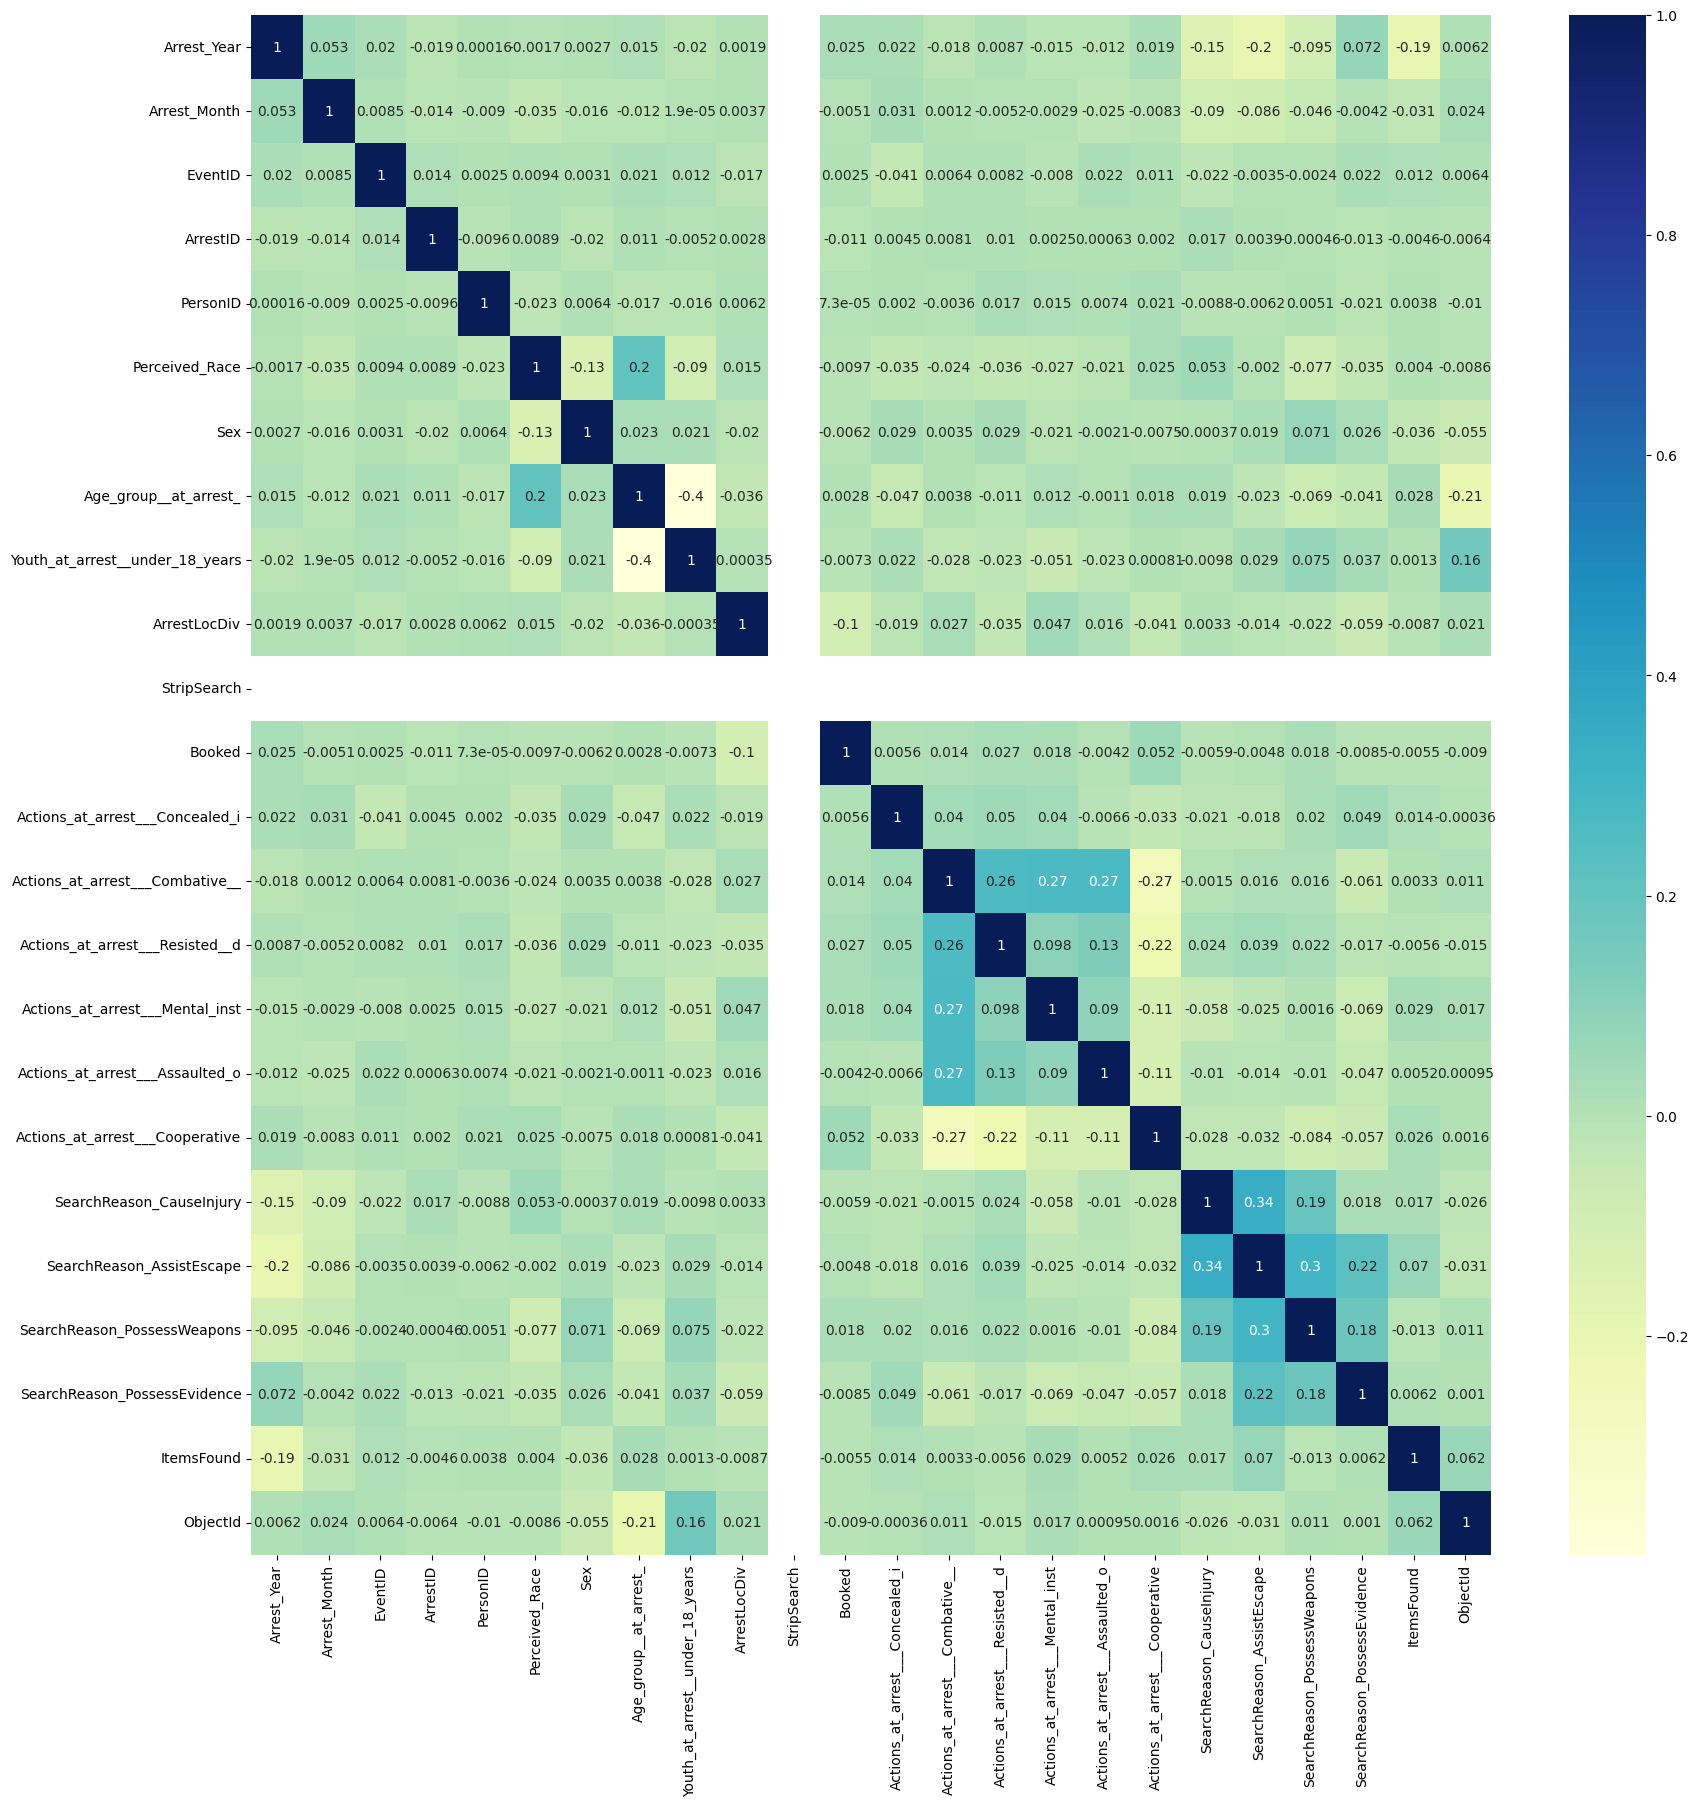

In [23]:
plt.figure(figsize=(20,20))
sns.heatmap(dataset.corr() , annot=True , cmap="YlGnBu")
plt.show()

*StripSearch, Age_group__at_arrest_,ItemsFound,Arrest_Year, Occurrence_Category, Actions_at_arrest___Combative__, Actions_at_arrest___Resisted__d ,Actions_at_arrest___Mental_inst and Actions_at_arrest___Cooperative , these Features are Highly Correlated with Youth_at_arrest_under_18_years. It means when Youth_at_arrest_under_18_years will reduced then other StripSearch, Age_group__at_arrest_,ItemsFound,Arrest_Year, Occurrence_Category, Actions_at_arrest___Combative__, Actions_at_arrest___Resisted__d ,Actions_at_arrest___Mental_inst and Actions_at_arrest___Cooperative are reduced automatically because these depend on the Youth under the age of 18 years*

**Drop The Columns**

In [24]:
dataset=dataset.drop(columns=['StripSearch', 'Age_group__at_arrest_','ItemsFound', 'Arrest_Year', 'Occurrence_Category' , 'Actions_at_arrest___Combative__', 'Actions_at_arrest___Resisted__d', 'Actions_at_arrest___Mental_inst','Actions_at_arrest___Cooperative','ObjectId','ArrestID'], axis=1)

**Scatter plot**

<Axes: xlabel='Arrest_Month', ylabel='Youth_at_arrest__under_18_years'>

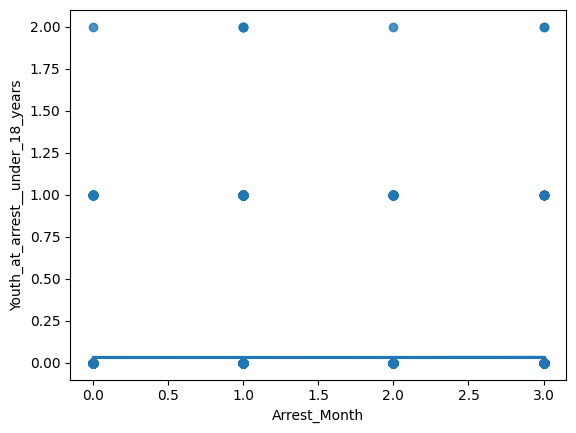

In [25]:
sns.regplot(x='Arrest_Month',y='Youth_at_arrest__under_18_years',data=dataset)

<Axes: xlabel='EventID', ylabel='Youth_at_arrest__under_18_years'>

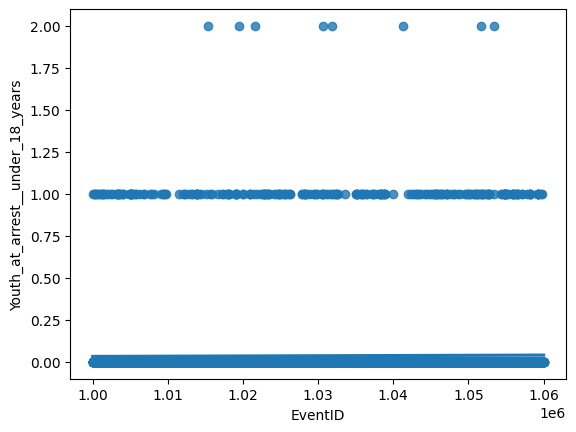

In [26]:
sns.regplot(x='EventID',y='Youth_at_arrest__under_18_years',data=dataset)

<Axes: xlabel='PersonID', ylabel='Youth_at_arrest__under_18_years'>

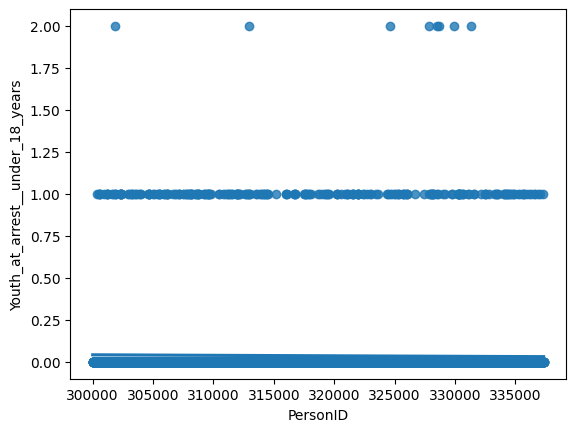

In [27]:
sns.regplot(x='PersonID',y='Youth_at_arrest__under_18_years',data=dataset)

<Axes: xlabel='Perceived_Race', ylabel='Youth_at_arrest__under_18_years'>

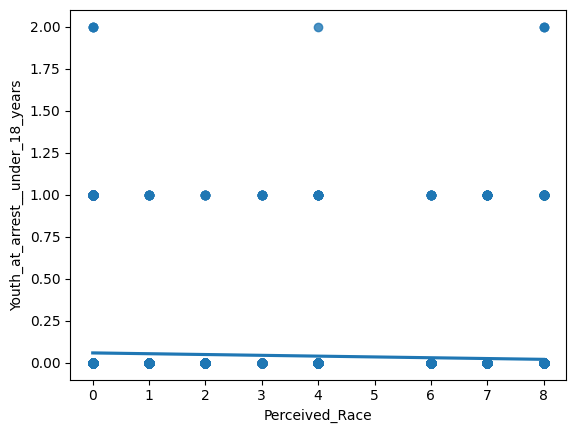

In [28]:
sns.regplot(x='Perceived_Race',y='Youth_at_arrest__under_18_years',data=dataset)

<Axes: xlabel='Sex', ylabel='Youth_at_arrest__under_18_years'>

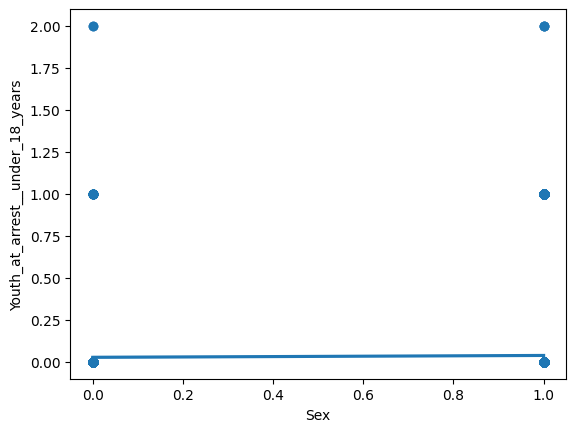

In [29]:
sns.regplot(x='Sex',y='Youth_at_arrest__under_18_years',data=dataset)

<Axes: xlabel='ArrestLocDiv', ylabel='Youth_at_arrest__under_18_years'>

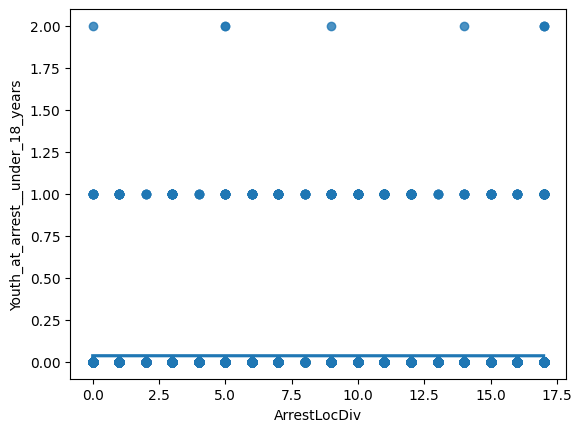

In [30]:
sns.regplot(x='ArrestLocDiv',y='Youth_at_arrest__under_18_years',data=dataset)

<Axes: xlabel='Booked', ylabel='Youth_at_arrest__under_18_years'>

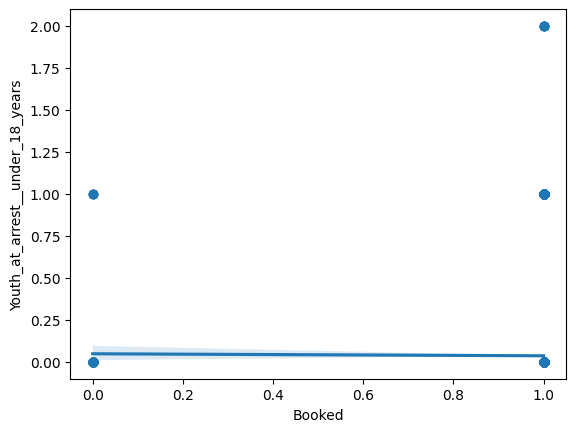

In [31]:
sns.regplot(x='Booked',y='Youth_at_arrest__under_18_years',data=dataset)

<Axes: xlabel='Actions_at_arrest___Concealed_i', ylabel='Youth_at_arrest__under_18_years'>

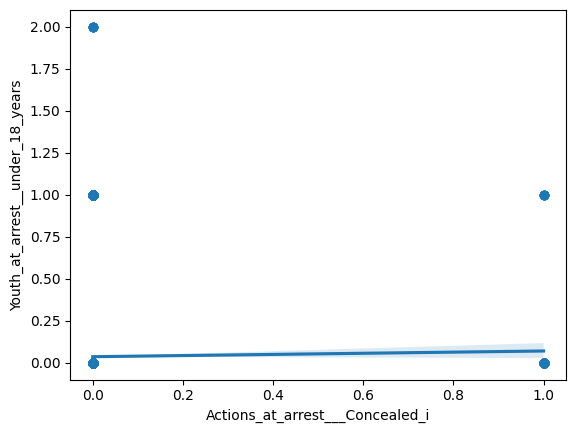

In [32]:
sns.regplot(x='Actions_at_arrest___Concealed_i',y='Youth_at_arrest__under_18_years',data=dataset)

<Axes: xlabel='Actions_at_arrest___Assaulted_o', ylabel='Youth_at_arrest__under_18_years'>

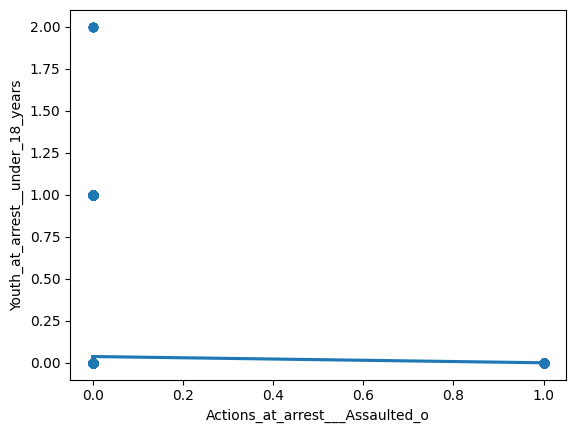

In [33]:
sns.regplot(x='Actions_at_arrest___Assaulted_o',y='Youth_at_arrest__under_18_years',data=dataset)

<Axes: xlabel='SearchReason_CauseInjury', ylabel='Youth_at_arrest__under_18_years'>

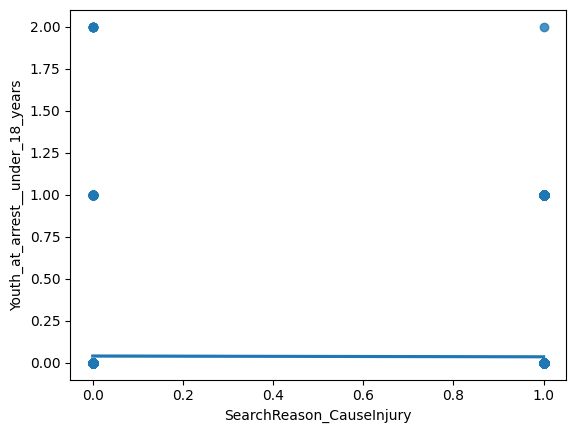

In [34]:
sns.regplot(x='SearchReason_CauseInjury',y='Youth_at_arrest__under_18_years',data=dataset)

<Axes: xlabel='SearchReason_AssistEscape', ylabel='Youth_at_arrest__under_18_years'>

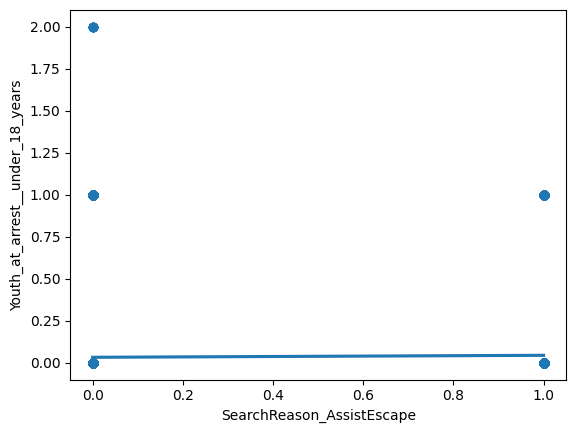

In [35]:
sns.regplot(x='SearchReason_AssistEscape',y='Youth_at_arrest__under_18_years',data=dataset)

<Axes: xlabel='SearchReason_PossessWeapons', ylabel='Youth_at_arrest__under_18_years'>

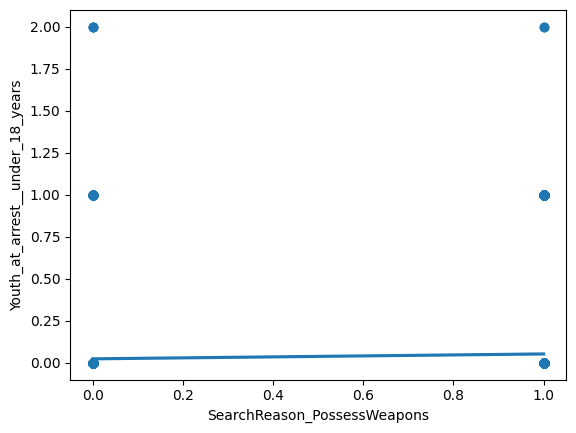

In [36]:
sns.regplot(x='SearchReason_PossessWeapons',y='Youth_at_arrest__under_18_years',data=dataset)

<Axes: xlabel='SearchReason_PossessEvidence', ylabel='Youth_at_arrest__under_18_years'>

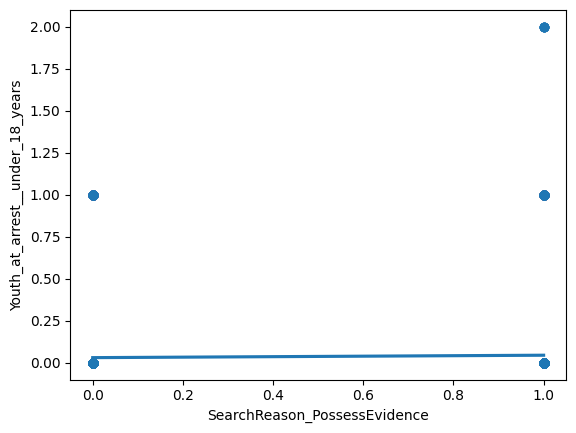

In [37]:
sns.regplot(x='SearchReason_PossessEvidence',y='Youth_at_arrest__under_18_years',data=dataset)

# One Way anova test

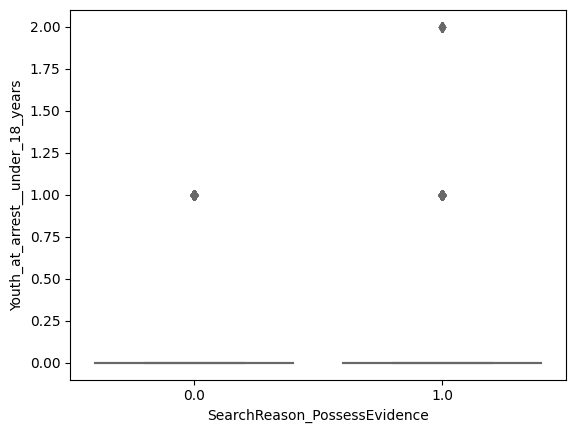

In [38]:
ax = sns.boxplot(x='SearchReason_PossessEvidence', y='Youth_at_arrest__under_18_years', data=dataset, color='#99c2a2')
plt.show()

In [39]:
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(dataset['Arrest_Month'], dataset['EventID'], dataset['PersonID'], dataset['Perceived_Race'],dataset['Sex'], dataset['Youth_at_arrest__under_18_years'], dataset['ArrestLocDiv'], dataset['Booked'],dataset['Actions_at_arrest___Concealed_i'], dataset['Actions_at_arrest___Assaulted_o'], dataset['SearchReason_CauseInjury'], dataset['SearchReason_AssistEscape'], dataset['SearchReason_PossessWeapons'], dataset['SearchReason_PossessEvidence'])
print('f-value=',fvalue,'p-value=', pvalue)

f-value= 19544076.61568767 p-value= 0.0


In [40]:
# Ordinary Least Squares (OLS) model
model = ols('Youth_at_arrest__under_18_years ~ C(SearchReason_PossessEvidence)', data=dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq      df         F    PR(>F)
C(SearchReason_PossessEvidence)    0.37146     1.0  9.908468  0.001652
Residual                         274.75799  7329.0       NaN       NaN

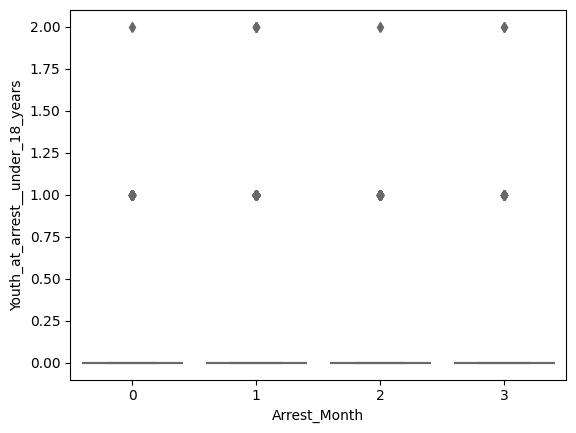

In [41]:
ax = sns.boxplot(x='Arrest_Month', y='Youth_at_arrest__under_18_years', data=dataset, color='#99c2a2')
plt.show()

In [42]:
# Ordinary Least Squares (OLS) model
model = ols('Youth_at_arrest__under_18_years ~ C(Arrest_Month)', data=dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq      df         F    PR(>F)
C(Arrest_Month)    0.541466     3.0  4.816087  0.002369
Residual         274.587985  7327.0       NaN       NaN

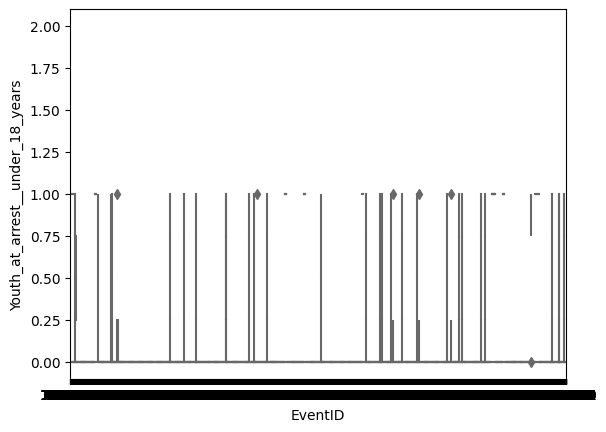

In [43]:
ax = sns.boxplot(x='EventID', y='Youth_at_arrest__under_18_years', data=dataset, color='#99c2a2')
plt.show()

In [44]:
# Ordinary Least Squares (OLS) model
model = ols('Youth_at_arrest__under_18_years ~ C(EventID)', data=dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq      df         F    PR(>F)
C(EventID)  252.31971  6682.0  1.072752  0.119151
Residual     22.80974   648.0       NaN       NaN

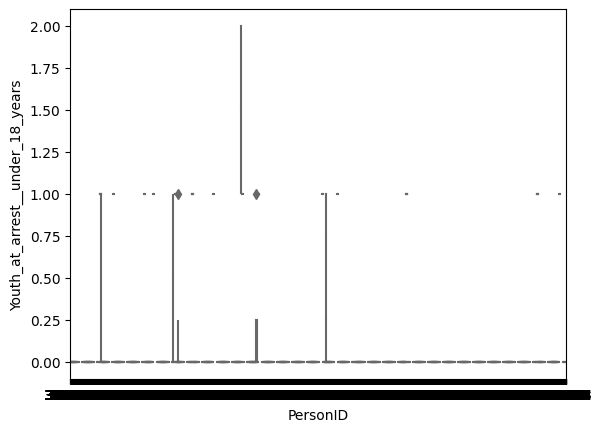

In [45]:
ax = sns.boxplot(x='PersonID', y='Youth_at_arrest__under_18_years', data=dataset, color='#99c2a2')
plt.show()

In [46]:
# Ordinary Least Squares (OLS) model
model = ols('Youth_at_arrest__under_18_years ~ C(PersonID)', data=dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq      df          F  PR(>F)
C(PersonID)  270.596117  4992.0  27.955923     0.0
Residual       4.533333  2338.0        NaN     NaN

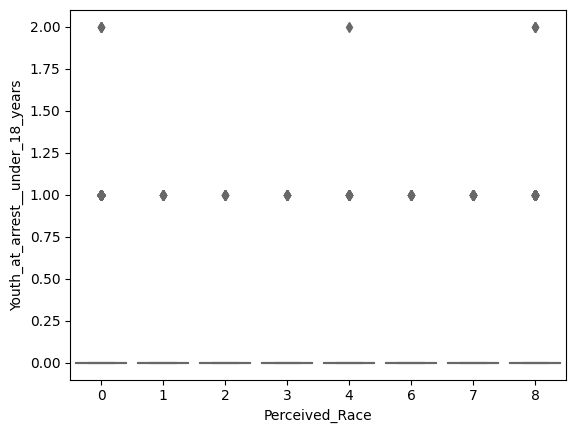

In [47]:
ax = sns.boxplot(x='Perceived_Race', y='Youth_at_arrest__under_18_years', data=dataset, color='#99c2a2')
plt.show()

In [48]:
# Ordinary Least Squares (OLS) model
model = ols('Youth_at_arrest__under_18_years ~ C(Perceived_Race)', data=dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq      df          F        PR(>F)
C(Perceived_Race)    3.129144     7.0  12.035029  2.314899e-15
Residual           272.000306  7323.0        NaN           NaN

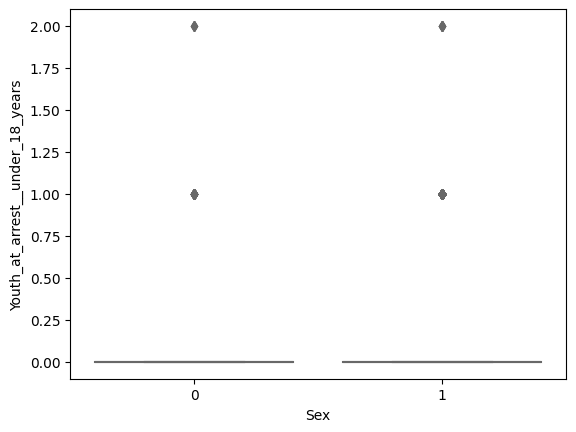

In [49]:
ax = sns.boxplot(x='Sex', y='Youth_at_arrest__under_18_years', data=dataset, color='#99c2a2')
plt.show()

In [50]:
# Ordinary Least Squares (OLS) model
model = ols('Youth_at_arrest__under_18_years ~ C(Sex)', data=dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq      df         F    PR(>F)
C(Sex)      0.127135     1.0  3.388235  0.065704
Residual  275.002315  7329.0       NaN       NaN

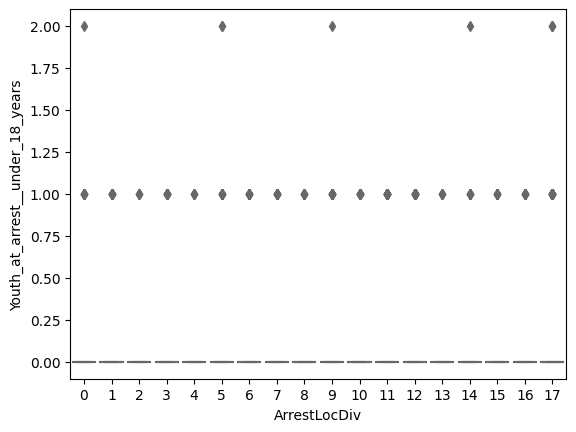

In [51]:
ax = sns.boxplot(x='ArrestLocDiv', y='Youth_at_arrest__under_18_years', data=dataset, color='#99c2a2')
plt.show()

In [52]:
# Ordinary Least Squares (OLS) model
model = ols('Youth_at_arrest__under_18_years ~ C(ArrestLocDiv)', data=dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq      df         F        PR(>F)
C(ArrestLocDiv)    2.43525    17.0  3.841619  1.487138e-07
Residual         272.69420  7313.0       NaN           NaN

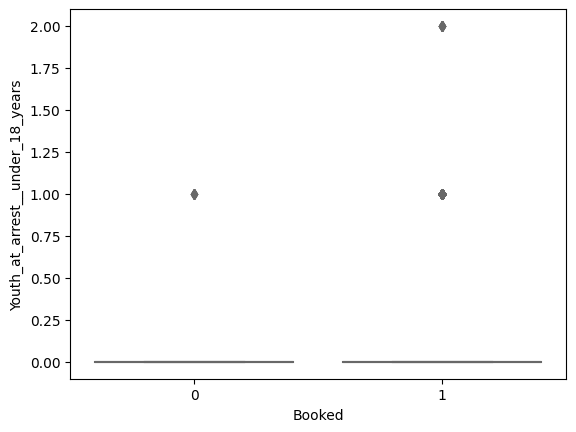

In [53]:
ax = sns.boxplot(x='Booked', y='Youth_at_arrest__under_18_years', data=dataset, color='#99c2a2')
plt.show()

In [54]:
# Ordinary Least Squares (OLS) model
model = ols('Youth_at_arrest__under_18_years ~ C(Booked)', data=dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq      df         F    PR(>F)
C(Booked)    0.01467     1.0  0.390809  0.531894
Residual   275.11478  7329.0       NaN       NaN

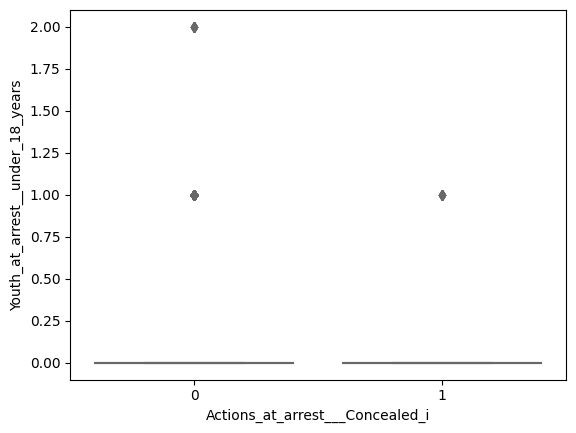

In [55]:
ax = sns.boxplot(x='Actions_at_arrest___Concealed_i', y='Youth_at_arrest__under_18_years', data=dataset, color='#99c2a2')
plt.show()

In [56]:
# Ordinary Least Squares (OLS) model
model = ols('Youth_at_arrest__under_18_years ~ C(Actions_at_arrest___Concealed_i)', data=dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq      df         F   PR(>F)
C(Actions_at_arrest___Concealed_i)    0.129817     1.0  3.459755  0.06292
Residual                            274.999633  7329.0       NaN      NaN

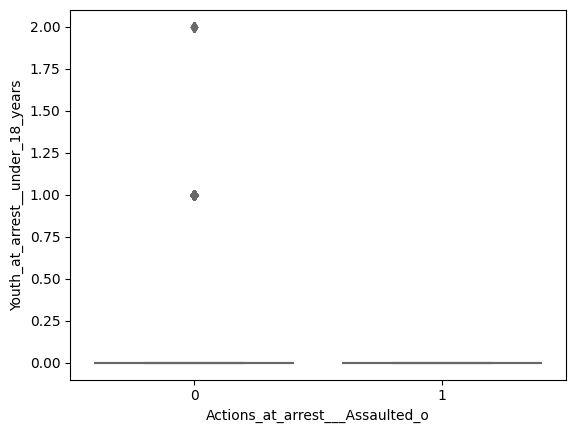

In [57]:
ax = sns.boxplot(x='Actions_at_arrest___Assaulted_o', y='Youth_at_arrest__under_18_years', data=dataset, color='#99c2a2')
plt.show()

In [58]:
# Ordinary Least Squares (OLS) model
model = ols('Youth_at_arrest__under_18_years ~ C(Actions_at_arrest___Assaulted_o)', data=dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq      df         F   PR(>F)
C(Actions_at_arrest___Assaulted_o)    0.151749     1.0  4.044589  0.04435
Residual                            274.977701  7329.0       NaN      NaN

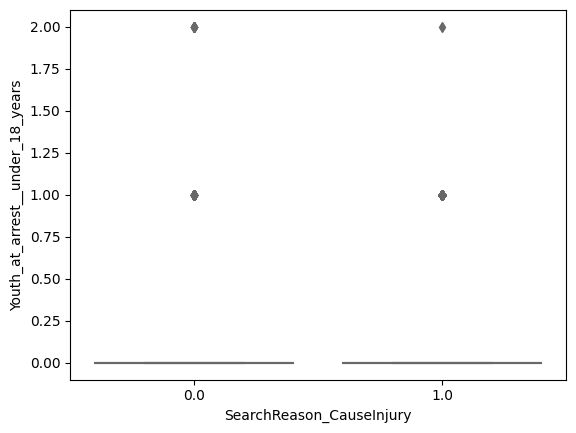

In [59]:
ax = sns.boxplot(x='SearchReason_CauseInjury', y='Youth_at_arrest__under_18_years', data=dataset, color='#99c2a2')
plt.show()

In [60]:
# Ordinary Least Squares (OLS) model
model = ols('Youth_at_arrest__under_18_years ~ C(SearchReason_CauseInjury)', data=dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq      df         F    PR(>F)
C(SearchReason_CauseInjury)    0.026328     1.0  0.701391  0.402344
Residual                     275.103123  7329.0       NaN       NaN

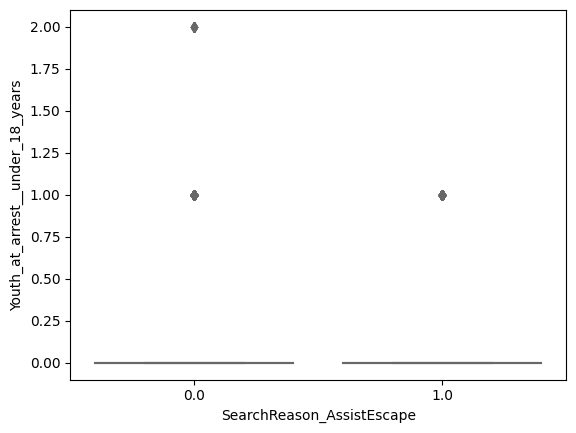

In [61]:
ax = sns.boxplot(x='SearchReason_AssistEscape', y='Youth_at_arrest__under_18_years', data=dataset, color='#99c2a2')
plt.show()

In [62]:
# Ordinary Least Squares (OLS) model
model = ols('Youth_at_arrest__under_18_years ~ C(SearchReason_AssistEscape)', data=dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq      df         F    PR(>F)
C(SearchReason_AssistEscape)    0.230757     1.0  6.152154  0.013148
Residual                      274.898693  7329.0       NaN       NaN

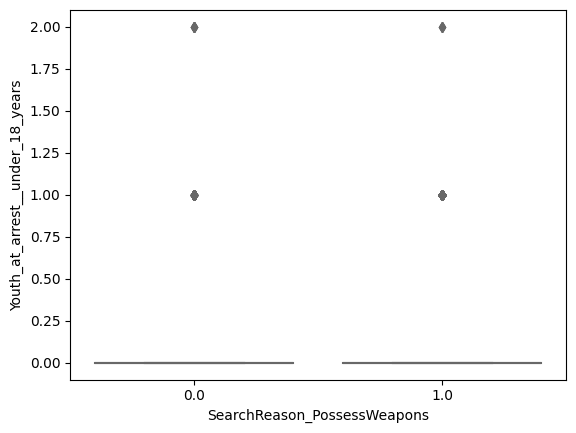

In [63]:
ax = sns.boxplot(x='SearchReason_PossessWeapons', y='Youth_at_arrest__under_18_years', data=dataset, color='#99c2a2')
plt.show()

In [64]:
# Ordinary Least Squares (OLS) model
model = ols('Youth_at_arrest__under_18_years ~ C(SearchReason_PossessWeapons)', data=dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq      df          F        PR(>F)
C(SearchReason_PossessWeapons)    1.532386     1.0  41.048895  1.576532e-10
Residual                        273.597064  7329.0        NaN           NaN

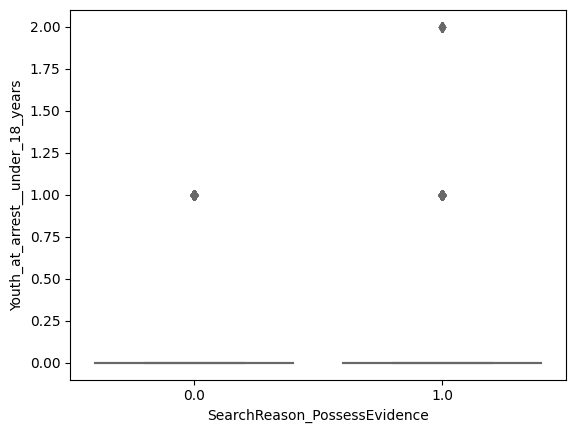

In [65]:
ax = sns.boxplot(x='SearchReason_PossessEvidence', y='Youth_at_arrest__under_18_years', data=dataset, color='#99c2a2')
plt.show()

In [66]:
# Ordinary Least Squares (OLS) model
model = ols('Youth_at_arrest__under_18_years ~ C(SearchReason_PossessEvidence)', data=dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq      df         F    PR(>F)
C(SearchReason_PossessEvidence)    0.37146     1.0  9.908468  0.001652
Residual                         274.75799  7329.0       NaN       NaN

# Analysis Result

**The F statistic and p-value turn out to be equal to 252021 and 0.0: respectively. Since the p-value is less than 0.05 hence we would reject the null hypothesis. This implies that we have sufficient proof to say that there exists a difference in the performance among 14 features different Arrest and Strip_Search dataset.**